# 実験の流れ

(1) ChatGPTを使うための前準備

(2) promptの練習

(3) 収集したtweetの中から、レビュー文でないものを除外

(4) アスペクトベースセンチメント分析

(5) アスペクトベースセンチメント分析結果の分析

=====

(1)〜(4)はapple_watch, fitbit, galaxy, google_pixel, iphone、100件ずつのデータ、(5)はChatGPTで解析済の全データ(計222,541件)を用います。

(1)〜(4)は各自でpromptを作成してもらうので、結果が若干異なりますが、(5)は全員同じデータでグラフを描画するので、同じグラフが出来上がります。

※　本来ならば全データ(計222,541件)に対しても、各自で作成したpromptを使って分析して欲しいのですが、その分API使用料が発生するだけでなく、実験時間内に終わらない(12時間以上かかる)ので、(5)は全員同じデータを使います。

# (1) ChatGPTを使うための前準備

# openaiライブラリをインストールします。

In [2]:
!pip install openai

# 組織IDとAPI_KEYを設定します。

# API_KEYはレポートを提出する日まで有効です。

In [ ]:
import openai
openai.organization = ""
openai.api_key = ""

# (2) promptの練習

In [4]:
import requests

def query_gpt35_turbo(prompt, api_key):
    """
    GPT-3.5-Turboモデルを利用してテキスト生成を行う。

    :param prompt: モデルに入力するテキスト
    :param api_key: OpenAIのAPIキー
    :return: モデルの応答テキスト
    """
    # APIエンドポイントを v1/chat/completions に変更
    url = "https://api.openai.com/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
    }
    payload = {
        "model": "gpt-3.5-turbo",
        "messages": [{"role": "user", "content": prompt}],
        "max_tokens": 100,
        "temperature": 0.5,
        "top_p": 1.0
    }

    response = requests.post(url, headers=headers, json=payload)
    response_data = response.json()

    # APIからの応答全体を確認
#    print("API Response:", response_data)

    # 応答テキストを取得
    if 'choices' in response_data and response_data['choices']:
        return response_data['choices'][0]['message']['content']
    else:
        # 'choices' キーがない、または空の場合はエラーメッセージを返す
        return "Error in API response: " + str(response_data)

In [ ]:
# 使用例
api_key = ''
prompt = """以下の文をアスペクトセンチメント分析して、アスペクトとセンチメントの表にまとめて。なお、アスペクトは「バッテリー」「サイズ・装着感」「機能性」「デザイン」のいずれかに分類すること。
今度のiPhoneデザインいいんだけど重い。
操作性はともかくバッテリーの持ちが悪い。
直感的に使いやすい。
iPhone買った。"""
generated_text = query_gpt35_turbo(prompt, api_key)
print("生成されたテキスト:", generated_text)

生成されたテキスト: | アスペクト | センチメント |
|----------|------------|
| デザイン   | Positive   |
| バッテリー  | Negative   |
| 機能性    | Positive   |


# (3) 収集したtweetの中から、レビュー文でないものを除外

In [ ]:
!wget http://nlp.ds.chuo-u.ac.jp/export/ds_exp_B/1_data.zip
!unzip 1_data.zip

--2025-06-24 06:54:45--  http://nlp.ds.chuo-u.ac.jp/export/ds_exp_B/1_data.zip
Resolving nlp.ds.chuo-u.ac.jp (nlp.ds.chuo-u.ac.jp)... 133.91.122.136
Connecting to nlp.ds.chuo-u.ac.jp (nlp.ds.chuo-u.ac.jp)|133.91.122.136|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8648031 (8.2M) [application/zip]
Saving to: ‘1_data.zip’

1_data.zip          100%[===================>]   8.25M  20.0MB/s    in 0.4s    

2025-06-24 06:54:45 (20.0 MB/s) - ‘1_data.zip’ saved [8648031/8648031]

Archive:  1_data.zip
   creating: 1_data/
  inflating: __MACOSX/._1_data       
  inflating: 1_data/apple_watch.txt  
  inflating: __MACOSX/1_data/._apple_watch.txt  
  inflating: 1_data/.DS_Store        
  inflating: __MACOSX/1_data/._.DS_Store  
  inflating: 1_data/apple_watch_filter.txt  
  inflating: __MACOSX/1_data/._apple_watch_filter.txt  
  inflating: 1_data/apple_watch-100.txt  
  inflating: __MACOSX/1_data/._apple_watch-100.txt  
  inflating: 1_data/iphone_absa.txt  
  inflating: _

In [1]:
# ChatGPT　apple watchかどうかの判定
import requests
import json

# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai

f=open('1_data/apple_watch-100.txt','r')
g=open('1_data/apple_watch-100_filter.txt','w')

cnt=0
for s in f:
  prompt=f"次の文が「製品やサービスに対するレビューに関するツイート」であれば、その文をそのまま出力してください。もしレビューに関する内容でなければ、空文字列''を出力してください。【入力文】{s}【出力】"
  generated_text = query_gpt35_turbo(prompt, api_key)
  # レビュー文と判定された時だけ、sを出力するように以下を修正する。
  if generated_text != "''":
    print(f"s:{s}")
  else:
    print("スキップ")
  print("----------------------------------------------------------------------------------------")
g.close()

FileNotFoundError: [Errno 2] No such file or directory: '1_data/apple_watch-100.txt'

# (4) アスペクトベースセンチメント分析

In [ ]:
# ChatGPT　アスペクトベースセンチメント分析 with ファイル
import requests
import json

# Note: you need to be using OpenAI Python v0.27.0 for the code below to work
import openai

# 全データを分析すると非常に時間がかかるので、100件だけ分析
f=open('1_data/apple_watch-100_filter.txt','r')
g=open('1_data/apple_watch-100_absa.txt','w')

cnt=0

for s in f:
  print(f)
  prompt ="""
    以下の"入力"の文をアスペクトベースセンチメント分析を以下の"3つのルール"に従って実行してください。

  "ルール1"
  対象が"スマートウォッチ"であれば、[バッテリー,操作性, デザイン,機能性,サイズ・装着感]5種類の観点それぞれでアスペクトベースセンチメント分析を実行してください。
  対象が"スマートフォン"であれば、[レスポンス,カメラ,操作性,バッテリー,デザイン,画面表示]6種類の観点それぞれでアスペクトベースセンチメント分析を実行してください。

  "ルール2"
  センチメントは、[ポジティブ, ネガティブ, ニュートラル]のどれかとしてください。

  "ルール3"
  出力形式は、csvとしてください。

  "入力"
    """+s
  # スマホとスマートウォッチでアスペクトの種類が違う点に注意すること。

  # 実行および結果の出力
  rslt = query_gpt35_turbo(prompt, api_key)
  g.write(rslt+'\n')

g.close()

# (5) アスペクトベースセンチメント分析結果の分析

ここから先は、すでに解析済のデータを利用します。

In [ ]:
# 全データの分析結果
f_applewatch=open('1_data/apple_watch_absa.txt','r')
f_fitbit=open('1_data/fitbit_absa.txt','r')
f_galaxy=open('1_data/galaxy_absa.txt','r')
f_google_pixel=open('1_data/google_pixel_absa.txt','r')
f_ipohne=open('1_data/iphone_absa.txt','r')

In [ ]:
# ファイルのフォーマットの確認
! head -10 1_data/apple_watch_absa.txt

機能性,ポジティブ,Apple Watch Ultraでの日本語入力、超便利かも！！\n\n
サイズ・装着感,ポジティブ,"バンドは色々買ったけど、軽くてサイズをピッタリ合わせられるスポーツループが一番使いやすい。"
サイズ・装着感,ポジティブ,Apple Watch Nike SE シルバーアルミニウムケースとピュアプラチナム/ブラックNikeスポーツバンド ケースサイズ：40mm
サイズ・装着感,ポジティブ,"Apple Watch SE（第1世代） スペースグレイアルミニウムケースとミッドナイトスポーツバンド ケースサイズ：40mm GPS＋Ce…\n＼"
サイズ・装着感,ポジティブ,Apple Watch SE（第2世代） ミッドナイトアルミニウムケースとミッドナイトスポーツバンドのケースサイズは44mmで、装着感がよく、手首にフィットしている。
サイズ・装着感,ポジティブ,Apple Watch SE（第2世代） ミッドナイトアルミニウムケースとミッドナイトスポーツバンド ケースサイズ：40mm GPS＋Cel…
サイズ・装着感,ポジティブ,「この記事、自分のブログでかなりのPVを稼いでくれている\n\nApple Watchを買った人しかわからない、「バンドのサイズ感」の要注意ポイント！サードパーティ製バンドを買って失敗！」
デザイン,ポジティブ,めちゃくちゃ軽くて格好良い,ニュートラル,オンもオフも使える,ポジティブ,使える,ポジティブ,気に入った
サイズ・装着感,ポジティブ,Apple Watch SE 第2世代（GPSモデル）- 40mmスターライト…
サイズ・装着感,ポジティブ,手首の上から電話の応答、メッセージの返信が可能


In [ ]:
!pip install matplotlib
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a3d94265b7d8114139c4796747f319bda19cafab961d0321de116331ea00c714
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [ ]:
from matplotlib import pyplot as plt
import japanize_matplotlib
import pandas as pd
import re


ファイル名：1_data/apple_watch_absa.txt


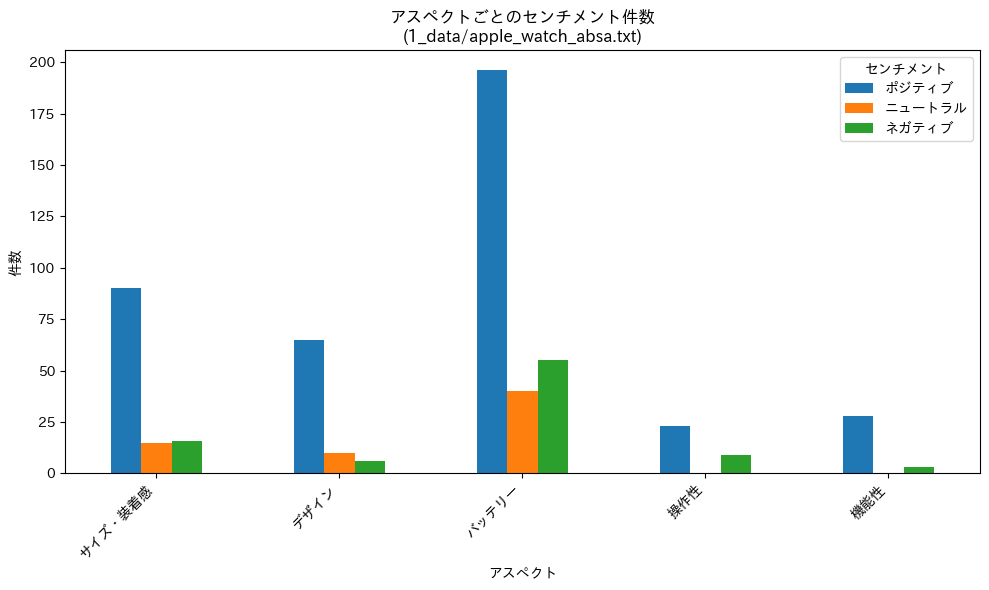

ファイル名：1_data/fitbit_absa.txt


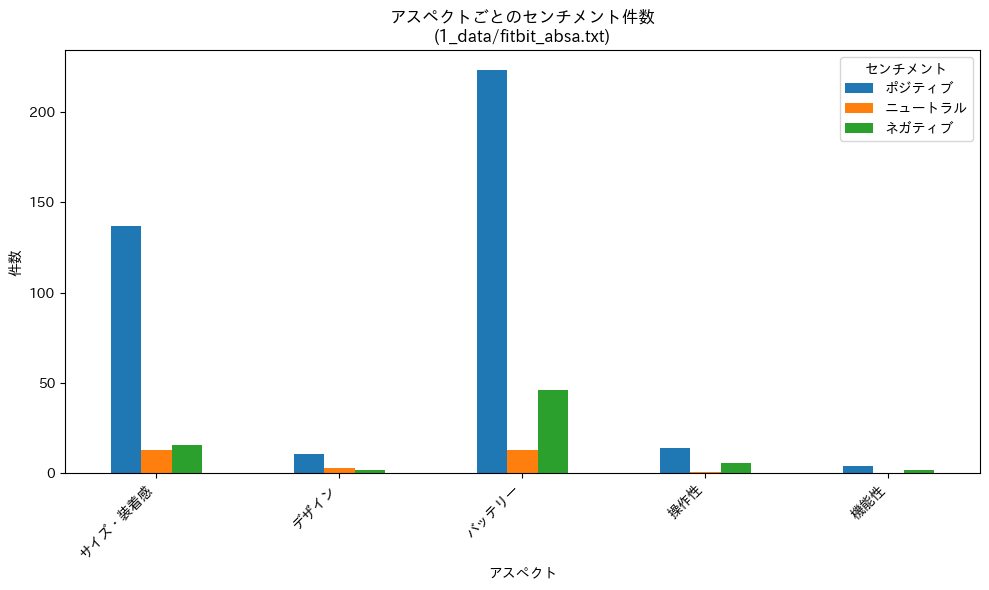

ファイル名：1_data/galaxy_absa.txt


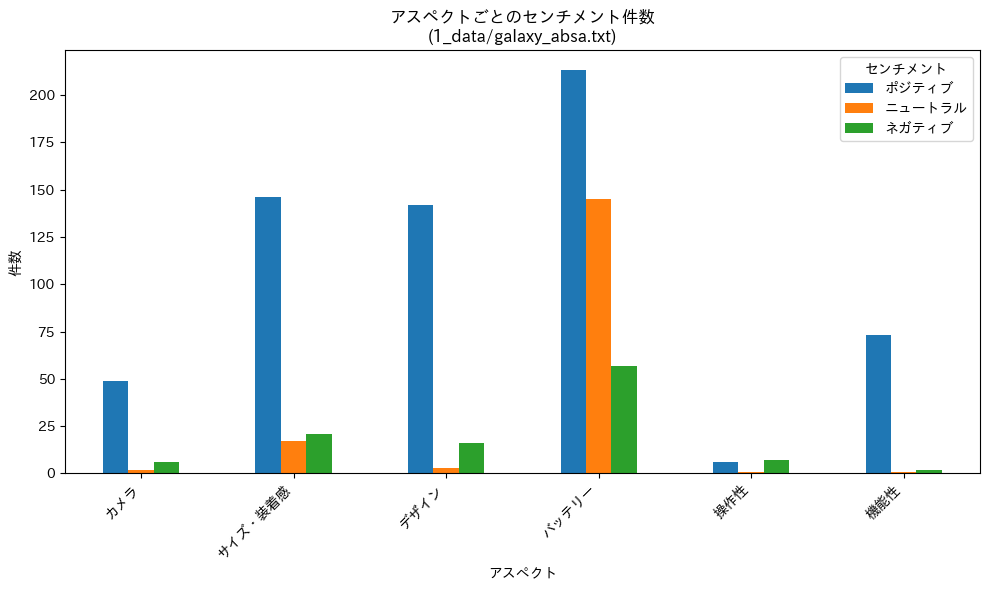

ファイル名：1_data/google_pixel_absa.txt


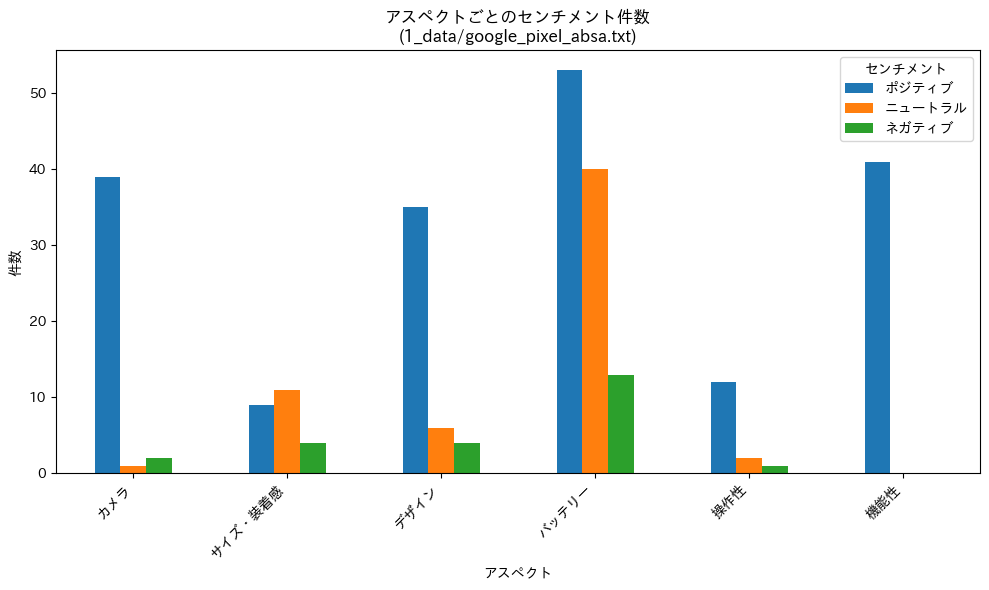

ファイル名：1_data/iphone_absa.txt


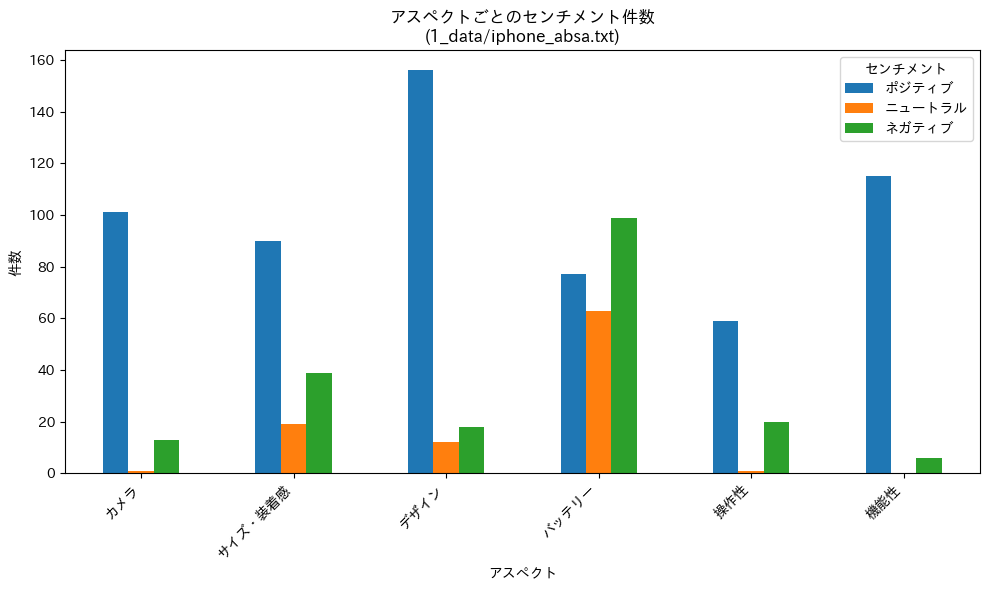

In [ ]:
valid_aspects = [
    "バッテリー", "操作性", "デザイン", "機能性", "サイズ・装着感",
    "レスポンス", "カメラ", "画面表示"
]

file_pathes = [
    "1_data/apple_watch_absa.txt",
    "1_data/fitbit_absa.txt",
    "1_data/galaxy_absa.txt",
    "1_data/google_pixel_absa.txt",
    "1_data/iphone_absa.txt"
]

for file_path in file_pathes:
    print(f"ファイル名：{file_path}")
    data = []

    # ファイルを行単位で読み込んで正規表現で抽出
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            match = re.match(r'^([^,]+),([^,]+),(.*)$', line)
            if match:
                aspect = match.group(1).strip()
                sentiment = match.group(2).strip()
                text = match.group(3).strip()
                # アスペクトが有効なものだけに限定
                if aspect in valid_aspects:
                    data.append([aspect, sentiment, text])

    # DataFrame 化
    df = pd.DataFrame(data, columns=["アスペクト", "センチメント", "本文"])

    if df.empty:
        print("対象アスペクトのデータが存在しません。")
        continue

    # センチメントの表示順固定
    sentiment_order = ["ポジティブ", "ニュートラル", "ネガティブ"]

    # ピボットテーブルで集計
    count_table = df.pivot_table(
        index="アスペクト", columns="センチメント",
        values="本文", aggfunc="count"
    ).fillna(0)

    # センチメント列を明示順に揃える（欠損も0埋め）
    for s in sentiment_order:
        if s not in count_table.columns:
            count_table[s] = 0
    count_table = count_table[sentiment_order]

    # 棒グラフで可視化
    count_table.plot(kind="bar", figsize=(10, 6))
    plt.title(f"アスペクトごとのセンチメント件数\n({file_path})")
    plt.xlabel("アスペクト")
    plt.ylabel("件数")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="センチメント")
    plt.tight_layout()
    plt.show()